# **[Chapter 03]**  
**┗ 자녀와 부모의 IQ 상관관계 분석**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* Data Spec Check
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리」
* 🥈Session 2 - 「EDA」
* 🥇Session 3 - 「Cross validation」

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir("/content/drive/MyDrive/인공지능/ML_Project_Collection/자녀와엄마IQ상관관계분석")
os.getcwd()

'/content/drive/MyDrive/인공지능/ML_Project_Collection/자녀와엄마IQ상관관계분석'

# **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🏭

```
전 세계의 많은 부모들은 자녀의 IQ에 대해서 궁금해한다.
심지어, 아직 결혼을 하지 않은 사람들까지도 미래에 생길지 모르는 자녀의 IQ에 대해서 궁금해한다.
데이터를 통해 자녀의 IQ와 부모의 IQ의 상관관계를 알 수 있을까?
```



> **데이터 살펴보기**

* 아이의 시험점수와 엄마의 정보
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|kid_score|아이의 시험 점수|
|mom_hs|엄마의 학력|
|mom_iq|엄마의 IQ|
|mom_work|엄마의 일하는 시간|
|mom_age|엄마의 나이|

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

kidiq = pd.read_csv('/content/drive/MyDrive/인공지능/ML_Project_Collection/자녀와엄마IQ상관관계분석/Data/kidiq.csv')
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


# **Data Spec Check**
---
> **Data 가공 명세서**

<img src = "/content/drive/MyDrive/인공지능/ML_Project_Collection/자녀와엄마IQ상관관계분석/momkidsiq.png">

# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 아이의 IQ와 엄마의 IQ에 대한 관심이 높아지고 있다. 진짜 둘은 관련이 있는지에 대해서 분석해보자
```  

> **기대효과**

```
▶ 관련이 있다면, 여러 연구를 진행하는 것에 사용할 수 있는 하나의 정보가 될 수 있을 것이다
```

> **해결방안**

```
▶ OLS(Ordinary Least Squares)를 이용한 Regression 방법 적용
▶ Session 1 🥉
 - Feature Engineering
 - OLS(Ordinary Least Squares) regression
▶ Session 2 🥈
 - 데이터 시각화
▶ Session 3 🥇
 - K-fold cross validation (statsmodels)
 - K-fold cross validation (scikit-learn)
```

> **성과측정**  

```
▶ 분석
```

> **현업적용**  

```
▶ 데이터 분석 역량
```

> **주요 핵심 미리 살펴보기**  

```
▶ Session 1 → Feature Extraction, OLS Regression
▶ Session 2 → 데이터 시각화
▶ Session 3 → K-fold cross validation (statsmodels, scikit-learn)
```

# **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

## - Data 전처리

---
* 수집된 데이터의 기본 정보들을 확인

  (1) Data shape(형태) 확인
  
  (2) Data type 확인

  (3) Null 확인 (※ 빈 값의 Data)

  (4) 추가 컬럼 생성

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm #Application Programming Interface
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [ ]:
# Data type 확인
kidiq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


In [ ]:
# Target이 NaN인 데이터 탐색
kidiq[kidiq['kid_score'].isna()].head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age


In [ ]:
# NaN 데이터 탐색
kidiq = kidiq.dropna()
print(kidiq.isnull().sum().sum())

0


In [ ]:
kidiq.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [ ]:
# 추가 컬럼 생성
kidiq['mom_iq_c'] = kidiq['mom_iq'] - kidiq['mom_iq'].mean()
kidiq['mom_age_c'] = kidiq['mom_age'] - kidiq['mom_age'].mean()
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,21.117529,4.214286
1,98,1,89.361882,4,25,-10.638118,2.214286
2,85,1,115.443165,4,27,15.443165,4.214286
3,83,1,99.449639,3,25,-0.550361,2.214286
4,115,1,92.745710,4,27,-7.254290,4.214286
...,...,...,...,...,...,...,...
429,94,0,84.877412,4,21,-15.122588,-1.785714
430,76,1,92.990392,4,23,-7.009608,0.214286
431,50,0,94.859708,2,24,-5.140292,1.214286
432,88,1,96.856624,2,21,-3.143376,-1.785714


array([[<Axes: title={'center': 'kid_score'}>,
        <Axes: title={'center': 'mom_hs'}>,
        <Axes: title={'center': 'mom_iq'}>],
       [<Axes: title={'center': 'mom_work'}>,
        <Axes: title={'center': 'mom_age'}>,
        <Axes: title={'center': 'mom_iq_c'}>],
       [<Axes: title={'center': 'mom_age_c'}>, <Axes: >, <Axes: >]],
      dtype=object)

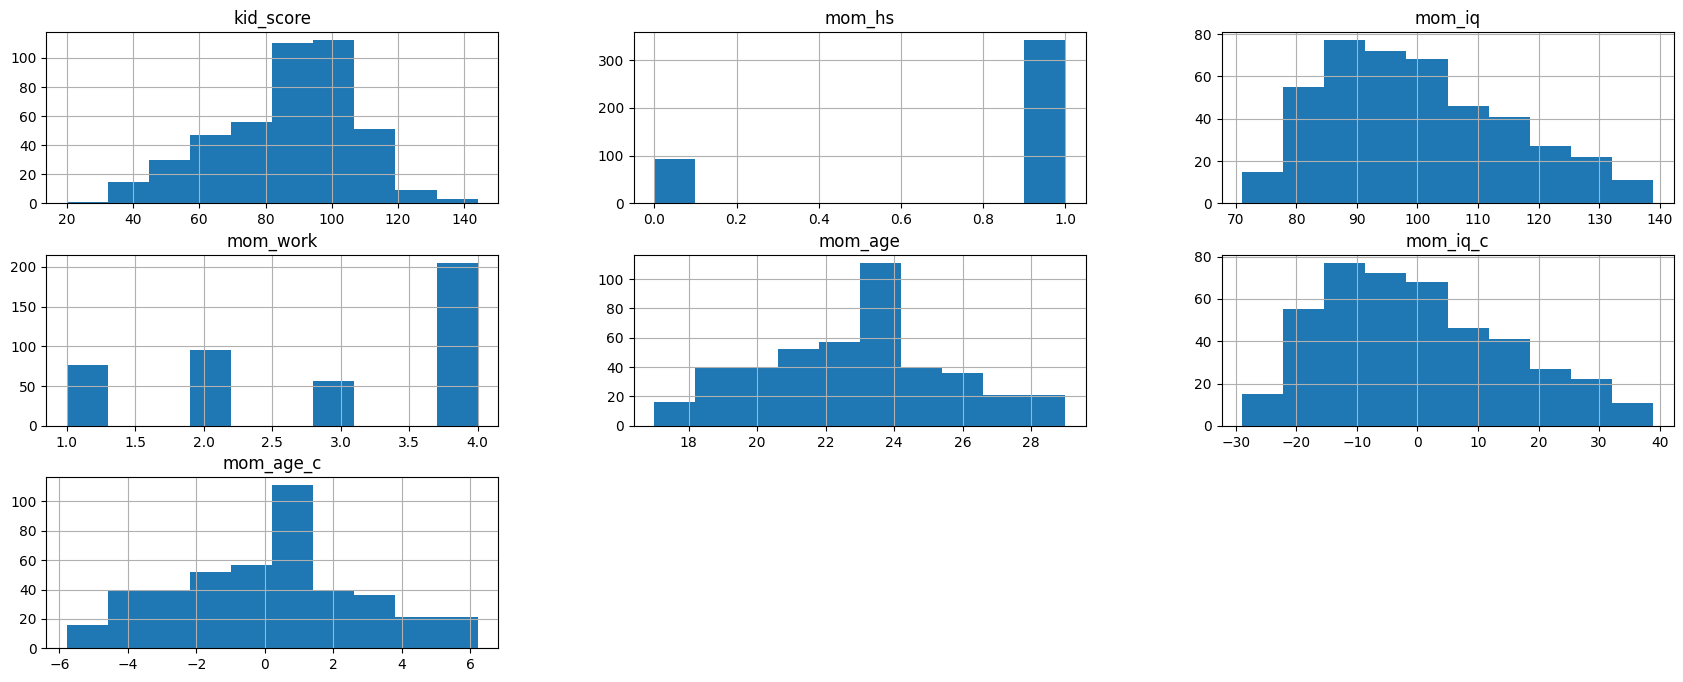

In [ ]:
kidiq.hist(figsize=(21,8))

# 🥈Session 2
**┗ EDA 결과 시각화**  
---

In [ ]:
# Fit regression model using centered version of mom_iq
# OLS: Ordinary Least Squares)
# 에러(잔차)의 제곱합 (RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법
fit1 = smf.ols('kid_score ~ 1 + mom_hs + mom_iq_c + mom_age_c', data=kidiq).fit()

# 1+ ? + ? + ?
# Inspect results
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.25
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.94e-22
Time:                        09:57:08   Log-Likelihood:                -1871.8
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     430   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.3602      1.976     41.676      0.0


1. **`smf.ols`** : `smf`는 `statsmodels` 라이브러리의 formula API를 의미합니다. `ols`는 "Ordinary Least Squares"의 줄임말로, 선형 회귀 분석을 수행하는 함수입니다.
  
2. **`'kid_score ~ 1 + mom_hs + mom_iq_c + mom_age_c'`** : 이 문자열은 회귀 모델의 수식을 나타냅니다.
    - `kid_score`는 종속 변수(목표 변수)입니다.
    - `1`은 절편(intercept)을 포함한다는 것을 의미합니다.
    - `mom_hs`, `mom_iq_c`, `mom_age_c`는 독립 변수(특성)입니다.
  
3. **`data=kidiq`** : `kidiq`는 데이터 프레임이며, 이 데이터 프레임에서 위의 변수들을 가져와 회귀 분석을 수행합니다.

4. **`fit()`** : 이 함수를 호출하여 선형 회귀 모델을 학습시킵니다.

5. **`print(fit1.summary())`** : 학습된 회귀 모델의 결과를 요약하여 출력합니다. 이 요약에는 회귀 계수, 통계적 유의성, R-제곱 값 등의 여러 통계치가 포함됩니다.

간단히 말하면, 이 코드는 `kidiq` 데이터 프레임에서 `kid_score`를 목표 변수로 하고, `mom_hs`, `mom_iq_c`, `mom_age_c`를 특성으로 사용하여 선형 회귀 모델을 학습시키는 작업을 수행합니다. 그리고 학습 결과를 요약하여 출력합니다.

In [ ]:
y = kidiq['kid_score']
X = kidiq[['mom_hs', 'mom_iq_c', 'mom_age_c']] # 1
X = sm.add_constant(X)

model1 = sm.OLS(y,X)

res1 = model1.fit()

print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.25
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.94e-22
Time:                        09:58:37   Log-Likelihood:                -1871.8
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     430   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.3602      1.976     41.676      0.0



1. **`y = kidiq['kid_score']`**: `kidiq` 데이터 프레임에서 `kid_score` 열을 선택하여 `y` 변수에 할당합니다. 이는 종속 변수(목표 변수)로 사용됩니다.

2. **`X = kidiq[['mom_hs', 'mom_iq_c', 'mom_age_c']]`**: `kidiq` 데이터 프레임에서 `mom_hs`, `mom_iq_c`, `mom_age_c` 세 열을 선택하여 `X` 변수에 할당합니다. 이들은 독립 변수(특성)로 사용됩니다. 여기서 주석으로 표시된 `# 1`은 코드의 설명을 위한 주석일 것으로 보입니다.

3. **`X = sm.add_constant(X)`**: `add_constant` 함수를 사용하여 `X` 데이터 프레임에 상수 항(절편)을 추가합니다. 이렇게 하면 회귀 분석 시 절편 항도 포함되게 됩니다.

4. **`model1 = sm.OLS(y,X)`**: `OLS` 함수를 사용하여 `y`와 `X`를 기반으로 선형 회귀 모델 객체를 생성합니다.

5. **`res1 = model1.fit()`**: `fit` 메서드를 사용하여 선형 회귀 모델을 학습시키고, 그 결과를 `res1` 변수에 저장합니다.

6. **`print(res1.summary())`**: 학습된 회귀 모델의 결과를 요약하여 출력합니다. 이 요약에는 회귀 계수, 통계적 유의성, R-제곱 값 등의 여러 통계치가 포함됩니다.

간단히 말하면, 이 코드는 `kidiq` 데이터 프레임을 사용하여 `kid_score`를 목표 변수로 하고, `mom_hs`, `mom_iq_c`, `mom_age_c`를 특성으로 하는 선형 회귀 모델을 학습시키는 작업을 수행합니다. 그리고 학습 결과를 요약하여 출력합니다.

In [ ]:
features = res1.params.index
coefs = [round(val, 4) for val in res1.params.values]

dict(zip(features, coefs))

{'const': 82.3602, 'mom_hs': 5.6472, 'mom_iq_c': 0.5625, 'mom_age_c': 0.2248}

In [ ]:
print("In-sample R-squared: %.3f" % round(res1.rsquared,3))

In-sample R-squared: 0.215


In [ ]:
print("In-sample RMSE: %.3f" % round(np.mean((y-res1.fittedvalues)**2)**0.5, 3))

In-sample RMSE: 18.063


In [ ]:
def abline(intercept, slope, **params):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', **params)

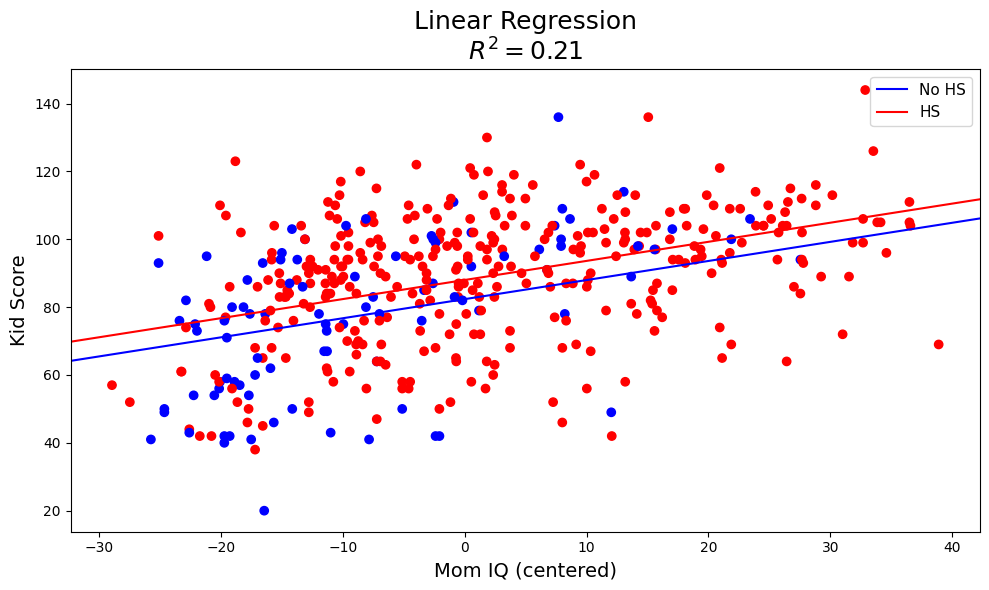

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {1:'red', 0:'blue'}
b_hat = fit1.params

ax.scatter(kidiq.mom_iq_c, kidiq.kid_score, color=kidiq.mom_hs.map(colors))

sm.graphics.abline_plot(intercept=b_hat['Intercept'],                 slope=b_hat['mom_iq_c'], color='blue',  label='No HS', ax=ax)
sm.graphics.abline_plot(intercept=b_hat['Intercept']+b_hat['mom_hs'], slope=b_hat['mom_iq_c'], color='red', label='HS',    ax=ax)
ax.set_ylabel('Kid Score', fontsize=14)
ax.set_xlabel('Mom IQ (centered)', fontsize=14)
ax.legend(fontsize=11)
ax.set_title('Linear Regression\n$R^2= %.2f$' % fit1.rsquared_adj, fontsize=18)

fig.tight_layout();


1. **`def abline(intercept, slope, **params):`**
    - `abline`이라는 함수를 정의하고 있습니다. 이 함수는 주어진 절편(`intercept`)과 기울기(`slope`) 값을 사용하여 직선을 그리는 역할을 합니다.
    - `plt.gca()`를 통해 현재 그래프의 축을 가져와 `axes` 변수에 할당합니다.
    - `x_vals`는 현재 그래프의 x축의 범위를 가져옵니다.
    - `y_vals`는 주어진 절편과 기울기를 사용하여 y값을 계산합니다.
    - `plt.plot`을 통해 계산된 x와 y 값을 사용하여 직선을 그립니다.

2. **`fig, ax = plt.subplots(figsize=(10, 6))`**
    - 10x6 크기의 그래프를 생성하고 그 그래프의 figure와 axes 객체를 각각 `fig`와 `ax`에 할당합니다.

3. **`colors = {1:'red', 0:'blue'}`**
    - 숫자 1에 대한 색은 'red', 0에 대한 색은 'blue'로 매핑하는 딕셔너리를 생성합니다.

4. **`b_hat = fit1.params`**
    - `fit1` 모델의 회귀 계수를 `b_hat`에 할당합니다.

5. **`ax.scatter(kidiq.mom_iq_c, kidiq.kid_score, color=kidiq.mom_hs.map(colors))`**
    - `kidiq.mom_iq_c`와 `kidiq.kid_score` 데이터를 사용하여 산점도를 그립니다.
    - 점의 색상은 `kidiq.mom_hs`의 값에 따라 `colors` 딕셔너리를 사용하여 결정됩니다.

6. **`sm.graphics.abline_plot(...)`**
    - `abline_plot`을 두 번 호출하여 두 개의 회귀 직선을 그립니다.
    - 첫 번째 직선은 'No HS' 레이블과 파란색으로, 두 번째 직선은 'HS' 레이블과 빨간색으로 그려집니다.

7. **`ax.set_ylabel(...)`, `ax.set_xlabel(...)`, `ax.legend(...)`, `ax.set_title(...)`**
    - 그래프의 y축 레이블, x축 레이블, 범례, 제목을 설정합니다.

8. **`fig.tight_layout();`**
    - 그래프의 레이아웃을 조절하여 요소들이 서로 겹치지 않게 합니다.

결론적으로, 이 코드는 `kidiq` 데이터셋을 사용하여 어머니의 IQ (`mom_iq_c`)와 아이의 점수 (`kid_score`) 사이의 관계를 나타내는 산점도와 두 개의 회귀 직선을 그리는 작업을 수행합니다. 회귀 직선은 어머니의 고등학교 졸업 여부 (`mom_hs`)에 따라 다르게 그려집니다.

# 🥇Session 3
**┗ Cross validation**  
---

## K-fold cross validation using statsmodels and scikit-learn

In [ ]:
len(y), round(len(y)*(4/5))

(434, 347)

In [ ]:
y = kidiq['kid_score']

X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)

X[:5]

,const,mom_hs,mom_iq_c
0,1.0,1,21.117529
1,1.0,1,-10.638118
2,1.0,1,15.443165
3,1.0,1,-0.550361
4,1.0,1,-7.254290


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['mom_iq_c'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['mom_iq_c'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['index', 'mom_iq_c']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['index', 'mom_iq_c', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['const', 'mom_iq_c', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['const', 'count()', None], **{})
chart

### R-squared

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()
    preds = res1.predict(X.loc[test,:])
    score = r2_score(y[test], preds)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))

print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.205
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.070
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.302
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.137
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.264

CV R-squared: 0.196 (+/- 0.084)


 이 코드는 교차 검증(cross-validation)을 사용하여 회귀 분석의 성능을 평가하는 코드입니다. K-Fold 교차 검증 방법을 사용하며, 5개의 fold로 데이터를 나눕니다. 코드를 한 단계씩 설명해 드리겠습니다.

1. `KFold(n_splits=5, shuffle=True, random_state=123)`:
   - `KFold`는 `scikit-learn`에서 제공하는 클래스로, 데이터를 K개의 fold로 나누어 교차 검증을 수행하기 위한 도구입니다.
   - `n_splits=5`는 데이터를 5개의 fold로 나눈다는 것을 의미합니다.
   - `shuffle=True`는 데이터를 나누기 전에 무작위로 섞는다는 것을 의미합니다.
   - `random_state=123`는 무작위 섞기의 시드 값을 123으로 설정한다는 것을 의미합니다.

2. `for k, (train, test) in enumerate(kfold.split(X, y)):`:
   - `kfold.split(X, y)`는 데이터 \( X \)와 \( y \)를 트레이닝 세트와 테스트 세트로 나누는 인덱스를 반환합니다.
   - `enumerate`를 사용하여 현재의 fold 번호도 같이 가져옵니다.

3. `res1 = sm.OLS(y[train], X.loc[train,:]).fit()`:
   - `sm.OLS`는 `statsmodels` 패키지의 OLS(Ordinary Least Squares) 회귀 분석 모델을 의미합니다.
   - 이 코드에서는 트레이닝 데이터로 회귀 모델을 학습시킵니다.

4. `preds = res1.predict(X.loc[test,:])`:
   - 학습된 회귀 모델을 사용하여 테스트 데이터의 \( y \) 값을 예측합니다.

5. `score = r2_score(y[test], preds)`:
   - 실제 \( y \) 값과 예측된 \( y \) 값을 비교하여 \( R^2 \) 값을 계산합니다. \( R^2 \)는 결정 계수로, 회귀 모델의 성능을 평가하는 지표입니다.

6. `print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))`:
   - 각 fold에 대한 트레이닝 데이터의 크기와 \( R^2 \) 값을 출력합니다.

7. `print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))`:
   - 모든 fold에서의 \( R^2 \) 값의 평균과 표준 편차를 출력합니다.

요약하면, 이 코드는 K-Fold 교차 검증을 사용하여 OLS 회귀 모델의 성능을 평가하고, 각 fold에서의 \( R^2 \) 값을 출력하는 코드입니다.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

kfold.split(X,y)

<generator object _BaseKFold.split at 0x7a9a65880580>

### RMSE

In [ ]:
y = kidiq['kid_score']

X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)

X[:5]

,const,mom_hs,mom_iq_c
0,1.0,1,21.117529
1,1.0,1,-10.638118
2,1.0,1,15.443165
3,1.0,1,-0.550361
4,1.0,1,-7.254290


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()
    preds = res1.predict(X.loc[test,:])
    score = mean_squared_error(y[test], preds, squared=False)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample RMSE: {:.3f}'.format(k+1, len(y[train]), score))

print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample RMSE: 18.394
Fold:  2, Training size: 347, Out-of-sample RMSE: 18.640
Fold:  3, Training size: 347, Out-of-sample RMSE: 17.431
Fold:  4, Training size: 347, Out-of-sample RMSE: 18.849
Fold:  5, Training size: 348, Out-of-sample RMSE: 17.594

CV RMSE: 18.182 (+/- 0.567)


먼저, 해당 코드의 전반적인 목적은 k-fold 교차 검증을 사용하여 회귀 모델의 성능을 평가하는 것입니다. 여기서 사용된 회귀 모델은 OLS (최소제곱 추정법)이며, 성능 지표로는 RMSE (Root Mean Squared Error)를 사용합니다.

코드를 단계별로 살펴보겠습니다:

1. `kfold = KFold(n_splits=5, shuffle=True, random_state=123)`
    - KFold 객체를 생성합니다. 교차 검증에서 데이터를 5개의 fold로 나눕니다.
    - `shuffle=True`는 데이터를 무작위로 섞어 각 fold가 데이터의 무작위 샘플을 포함하도록 합니다.
    - `random_state=123`은 결과의 재현성을 위해 랜덤 시드를 설정합니다.

2. `scores = []`
    - 각 fold에서 얻은 RMSE 값을 저장할 빈 리스트를 생성합니다.

3. `for k, (train, test) in enumerate(kfold.split(X, y)):`
    - KFold 객체의 `split` 메서드를 사용하여 데이터를 학습 및 테스트 세트로 나눕니다.
    - 이 반복문은 총 5번 실행됩니다 (5개의 fold).

4. `res1 = sm.OLS(y[train], X.loc[train,:]).fit()`
    - OLS 모델을 학습 데이터로 학습시킵니다.

5. `preds = res1.predict(X.loc[test,:])`
    - 학습된 모델을 사용하여 테스트 데이터에 대한 예측 값을 얻습니다.

6. `score = mean_squared_error(y[test], preds, squared=False)`
    - 실제 값 (`y[test]`)과 예측 값 (`preds`) 사이의 RMSE 값을 계산합니다.

7. `scores.append(score)`
    - 계산된 RMSE 값을 `scores` 리스트에 추가합니다.

8. `print(...)`
    - 현재 fold의 정보와 해당 fold에서의 RMSE 값을 출력합니다.

9. `print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))`
    - 모든 fold에서 얻은 RMSE 값의 평균 및 표준편차를 출력합니다.

요약하면, 이 코드는 5-fold 교차 검증을 사용하여 OLS 회귀 모델의 성능을 평가하고, 각 fold에서의 RMSE 값을 계산하여 최종적으로 평균 RMSE와 표준편차를 출력합니다.

## Create an interaction term between `mom_hs` and `mom_iq_c`

In [ ]:
y = kidiq['kid_score']

kidiq['mom_hs_iq_c'] = kidiq['mom_hs'] * kidiq['mom_iq_c']

X = kidiq[['mom_hs', 'mom_iq_c', 'mom_hs_iq_c']]
X = sm.add_constant(X)

X[-5:]

,const,mom_hs,mom_iq_c,mom_hs_iq_c
429,1.0,0,-15.122588,-0.000000
430,1.0,1,-7.009608,-7.009608
431,1.0,0,-5.140292,-0.000000
432,1.0,1,-3.143376,-3.143376
433,1.0,1,-8.746664,-8.746664


## Run **5**-fold cross-validation on the expanded model that includes `mom_hs`, `mom_iq_c`, and `mom_hs`*`mom_iq_c`

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()
    preds = res1.predict(X.loc[test,:])
    score = r2_score(y[test], preds)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))

print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.224
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.103
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.322
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.103
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.290

CV R-squared: 0.208 (+/- 0.092)


## Run 10-fold cross-validation on the expanded model, using `RMSE` as the evaluation metric

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()
    preds = res1.predict(X.loc[test,:])
    score = mean_squared_error(y[test], preds, squared=False)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample RMSE: {:.3f}'.format(k+1, len(y[train]), score))

print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 390, Out-of-sample RMSE: 18.557
Fold:  2, Training size: 390, Out-of-sample RMSE: 17.975
Fold:  3, Training size: 390, Out-of-sample RMSE: 19.506
Fold:  4, Training size: 390, Out-of-sample RMSE: 16.829
Fold:  5, Training size: 391, Out-of-sample RMSE: 18.527
Fold:  6, Training size: 391, Out-of-sample RMSE: 16.476
Fold:  7, Training size: 391, Out-of-sample RMSE: 20.745
Fold:  8, Training size: 391, Out-of-sample RMSE: 16.658
Fold:  9, Training size: 391, Out-of-sample RMSE: 17.683
Fold: 10, Training size: 391, Out-of-sample RMSE: 17.010

CV RMSE: 17.997 (+/- 1.302)


## Kfold cross validation "by hand"

#### R-squared

In [ ]:
y = kidiq['kid_score'].values
X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)
X = X.values
y

array([ 65,  98,  85,  83, 115,  98,  69, 106, 102,  95,  91,  58,  84,
        78, 102, 110, 102,  99, 105, 101, 102, 115, 100,  87,  99,  96,
        72,  78,  77,  98,  69, 130, 109, 106,  92, 100, 107,  86,  90,
       110, 107, 113,  65, 102, 103, 111,  42, 100,  67,  92, 100, 110,
        56, 107,  97,  56,  95,  78,  76,  86,  79,  81,  79,  79,  56,
        52,  63,  80,  87,  88,  92, 100,  94, 117, 102, 107,  99,  73,
        56,  78,  94, 110, 109,  86,  92,  91, 123, 102, 105, 114,  96,
        66, 104, 108,  84,  83,  83,  92, 109,  95,  93, 114, 106,  87,
        65,  95,  61,  73, 112, 113,  49, 105, 122,  96,  97,  94, 117,
       136,  85, 116, 106,  99,  94,  89, 119, 112, 104,  92,  86,  69,
        45,  57,  94, 104,  89, 144,  52, 102, 106,  98,  97,  94, 111,
       100, 105,  90,  98, 121, 106, 121, 102,  64,  99,  81,  69,  84,
       104, 104, 107,  88,  67, 103,  94, 109,  94,  98, 102, 104, 114,
        87, 102,  77, 109,  94,  93,  86,  97,  97,  88, 103,  8

In [ ]:
[84, 84, 84, 84, 84]

[84, 84, 84, 84, 84]

In [ ]:
n_samples = len(y)
indices = np.arange(n_samples)

n_splits = 5
num_val_samples = np.full(n_splits, n_samples // n_splits, dtype=int)
num_val_samples[: n_samples % n_splits] += 1

scores = []
for i in range(n_splits):
    start =  i      * num_val_samples[i]
    stop  = (i + 1) * num_val_samples[i] # data [0:84]
    y_test = y[indices[start:stop]]
    X_test = X[indices[start:stop], :]
    y_train = np.concatenate([ y[indices[:start]] ,
                               y[indices[stop:]] ] , axis=0)
    X_train = np.concatenate([ X[indices[:start], :] ,
                               X[indices[stop:], :] ] , axis=0)

    res1 = sm.OLS(y_train, X_train).fit()
    score = res1.rsquared
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(i+1, len(y_train), score))

print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.252
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.185
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.205
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.196
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.228

CV R-squared: 0.213 (+/- 0.024)


#### RMSE

In [ ]:
y = kidiq['kid_score'].values
X = kidiq[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)
X = X.values

n_samples = len(y)
indices = np.arange(n_samples)

n_splits = 5
num_val_samples = np.full(n_splits, n_samples // n_splits, dtype=int)
num_val_samples[: n_samples % n_splits] += 1

scores = []
for i in range(n_splits):
    start =  i      * num_val_samples[i]
    stop  = (i + 1) * num_val_samples[i]
    y_test = y[indices[start:stop]]
    X_test = X[indices[start:stop], :]
    y_train = np.concatenate([ y[indices[:start]] ,
                               y[indices[stop:]] ] , axis=0)
    X_train = np.concatenate([ X[indices[:start], :] ,
                               X[indices[stop:], :] ] , axis=0)

    res1 = sm.OLS(y_train, X_train).fit()
    preds = res1.predict(X_test)
    score = np.mean((y_test - preds)**2)**0.5
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, RMSE: {:.3f}'.format(i+1, len(y_train), score))

print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, RMSE: 18.242
Fold:  2, Training size: 347, RMSE: 17.234
Fold:  3, Training size: 347, RMSE: 15.566
Fold:  4, Training size: 347, RMSE: 23.994
Fold:  5, Training size: 348, RMSE: 18.744

CV RMSE: 18.756 (+/- 2.835)


## Using scikit-learn

In [ ]:
y = kidiq['kid_score']
y

0       65
1       98
2       85
3       83
4      115
      ... 
429     94
430     76
431     50
432     88
433     70
Name: kid_score, Length: 434, dtype: int64

In [ ]:
X = kidiq[['mom_hs', 'mom_iq_c']]
X

,mom_hs,mom_iq_c
0,1,21.117529
1,1,-10.638118
2,1,15.443165
3,1,-0.550361
4,1,-7.254290
...,...,...
429,0,-15.122588
430,1,-7.009608
431,0,-5.140292
432,1,-3.143376


In [ ]:
lm1 = LinearRegression().fit(X, y)
lm1

LinearRegression()

In [ ]:
coefs = [round(val, 3) for val in list(np.concatenate((lm1.intercept_, lm1.coef_), axis=None))]
features = list(np.concatenate((np.array('Intercept'), lm1.feature_names_in_), axis=None))

dict(zip(features, coefs))

{'Intercept': 82.122, 'mom_hs': 5.95, 'mom_iq_c': 0.564}

In [ ]:
# The in-sample coefficient of determination: 1 is perfect prediction
print("In-sample R-squared: %.3f" % round(lm1.score(X, y), 3))

In-sample R-squared: 0.214


## Cross validation using scikit-learn

#### R-squared

In [51]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    lm1.fit(X.loc[train,:], y[train])
    score = lm1.score(X.loc[test,:], y[test])
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))

print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.205
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.070
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.302
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.137
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.264

CV R-squared: 0.196 (+/- 0.084)


#### RMSE

In [52]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    lm1.fit(X.loc[train,:], y[train])
    preds = lm1.predict(X.loc[test,:])
    score = mean_squared_error(y[test], preds, squared=False)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample RMSE: {:.3f}'.format(k+1, len(y[train]), score))

print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores, ddof=1) * 2))

Fold:  1, Training size: 347, Out-of-sample RMSE: 18.394
Fold:  2, Training size: 347, Out-of-sample RMSE: 18.640
Fold:  3, Training size: 347, Out-of-sample RMSE: 17.431
Fold:  4, Training size: 347, Out-of-sample RMSE: 18.849
Fold:  5, Training size: 348, Out-of-sample RMSE: 17.594

CV RMSE: 18.182 (+/- 1.268)


# Lesson and Learned

## Cross validation은 어떨때 유의미하게 사용될 수 있는가?

### 1. 데이터의 크기가 매우 커서 나눠지는 데이터의 분포를 담보할 수 없을 때
### 2. 모델의 복잡도가 매우 높아서 데이터의 특성에 따라 결과가 바뀔 때
### 3. 대부분의 경우

## Cross validation의 결과에서 특정 Fold에서만 결과가 잘나오는 경우, 배포는 어떻게 하면 될까?
### 예를 들어, 5-fold cross validation에서 1번 3번의 fold에서만 결과가 잘 나오고, 2,4,5번의 fold에서는 결과가 잘 나오지 않을 때는 어떻게 할까?
#### 1. 보통의 경우, 결과는 모든 fold에서 대해서 정리하고 가장 결과가 좋은 데이터를 활용한 모델의 weight를 이용하여 최종 모델을 생성
#### 2. 2,4,5번의 fold의 데이터를 별개로 분석하여 해당 데이터셋에서 결과가 낮게 나오는 이유를 분석하여 모델링 특성에 반영
#### ※ 그러나, 전체 데이터를 모두 반영한 모델의 찾는 것은 매우 어렵기 때문에 Trade-off 관계를 분석하여 타협점이 찾는 것이 최적

먼저 주어진 Jupyter 노트북 파일의 내용을 읽어보겠습니다.

Jupyter 노트북 파일의 첫 5개의 코드 셀 내용은 다음과 같습니다:

1. **환경 설정 및 경고 메시지 제거**
   - Warnings 모듈을 사용하여 경고 메시지를 제거합니다.
   - Google Colab의 드라이브 마운트 코드가 주석 처리되어 있습니다.
   - 작업 경로를 설정하고 현재 작업 경로를 출력합니다.

2. **데이터 로딩**
   - pandas를 사용하여 데이터를 로드합니다. `kidiq.csv`라는 이름의 파일을 로드하고 이를 `kidiq`라는 DataFrame으로 저장합니다. 그리고 처음 5행을 출력합니다.

3. **모듈 임포트**
   - 데이터 분석 및 모델링에 필요한 다양한 모듈을 임포트합니다. 여기에는 numpy, pandas, matplotlib, patsy, statsmodels, sklearn의 여러 모듈 등이 포함되어 있습니다.

4. **데이터 출력**
   - `kidiq` DataFrame을 출력합니다.

5. **데이터 타입 확인**
   - `kidiq` DataFrame의 정보를 출력하여 각 열의 데이터 타입을 확인합니다.

첫 5개의 코드 셀을 기반으로, 이 노트북은 자녀와 엄마의 IQ 상관관계 분석을 위한 데이터 분석 및 모델링 작업을 수행할 것으로 보입니다. 코드 전체를 분석하여 더 자세한 리뷰를 제공하겠습니다.

이제 Jupyter 노트북의 전체 내용을 순차적으로 살펴보며 리뷰를 진행하겠습니다.

**Note**: 리뷰 과정에서 코드 셀의 내용뿐만 아니라 각 코드 사이의 설명 및 주석도 함께 확인하겠습니다.

Jupyter 노트북의 첫 부분에 대한 리뷰를 제공하겠습니다.

---

### 1. **Chapter 03: 자녀와 부모의 IQ 상관관계 분석**
   - 해당 노트북은 자녀와 부모의 IQ 상관관계를 분석하는 내용을 담고 있습니다.
   - 주요 섹션으로는 데이터 사양 확인, 데이터 전처리, EDA, 그리고 교차 검증이 포함되어 있습니다.

### 2. **환경 설정 및 데이터 로딩**
   - 경고 메시지를 숨기기 위해 `warnings` 모듈을 사용합니다.
   - Google Colab에 연결하는 코드가 주석 처리되어 있습니다.
   - 작업 경로가 설정되어 있으며, `kidiq.csv` 파일을 로드하여 `kidiq`라는 DataFrame으로 저장합니다.

### 3. **문제상황 및 데이터 설명**
   - 주제에 대한 시나리오와 문제 상황을 소개합니다.
   - 사용할 데이터의 컬럼과 설명을 제공합니다. 주요 컬럼으로는 아이의 시험 점수, 엄마의 학력, 엄마의 IQ, 엄마의 근무 시간, 엄마의 나이 등이 있습니다.

### 4. **문제해결 프로세스 정의**
   - 문제, 기대 효과, 해결 방안, 성과 측정, 현업 적용 등에 대한 설명이 포함되어 있습니다.
   - OLS(Ordinary Least Squares) 회귀를 사용하여 문제를 해결할 계획입니다.

### 5. **Session 1: Data 전처리 및 EDA**
   - 데이터 전처리를 위한 작업을 시작합니다.
   - 데이터의 기본 정보를 확인하려는 계획을 세웠습니다. 예를 들면, 데이터의 형태, 데이터 타입, 누락된 값, 추가 컬럼 생성 등입니다.
   - 다양한 라이브러리를 임포트합니다. 이러한 라이브러리들은 데이터 분석, 시각화, 모델링 등의 작업을 위해 사용될 것입니다.

---

이상의 내용을 기반으로, 노트북은 자녀와 부모의 IQ 상관관계를 분석하기 위한 준비 작업과 데이터 전처리를 시작하고 있습니다. 이제 노트북의 다음 부분을 살펴보겠습니다.

노트북의 다음 부분에 대한 리뷰를 제공하겠습니다.

---

### 1. **데이터 전처리 (계속)**
   
   - **데이터 출력**: `kidiq` DataFrame의 내용을 출력합니다.
   
   - **데이터 타입 확인**: 각 열의 데이터 타입과 누락된 값의 개수를 확인합니다.
   
   - **NaN 데이터 탐색**: `kid_score` 컬럼에서 NaN 값을 가진 데이터를 조회합니다.
   
   - **NaN 데이터 처리**: NaN 값을 가진 행을 삭제하고, NaN 값이 제대로 제거되었는지 확인합니다.
   
   - **기초 통계 정보**: `kidiq` DataFrame의 기초 통계 정보 (평균, 표준편차, 최솟값, 최댓값 등)를 출력합니다.
   
   - **추가 컬럼 생성**: `mom_iq`와 `mom_age` 컬럼을 중심화(centering)하여 새로운 컬럼 `mom_iq_c`와 `mom_age_c`를 생성합니다. 중심화는 변수의 값을 그 변수의 평균값으로 빼는 것을 의미하며, 회귀분석에서 변수 간의 관계를 명확하게 파악하기 위해 사용되는 기법입니다.
   
   - **히스토그램 출력**: 각 변수의 분포를 히스토그램으로 시각화합니다.

### 2. **EDA 결과 시각화 (Session 2 시작)**
   
   - **선형 회귀 모델 학습**: 자녀의 점수(`kid_score`)를 예측하기 위해 `mom_hs`, `mom_iq_c`, `mom_age_c`를 독립 변수로 사용하는 선형 회귀 모델을 학습시킵니다. 그리고 학습된 모델의 결과를 요약하여 출력합니다.
   
     - 이 회귀 모델은 엄마의 학력, 중심화된 IQ, 중심화된 나이를 사용하여 아이의 IQ를 예측하는 것을 목표로 합니다.

### 3. **설명**
   
   - 마지막으로 제공된 마크다운 셀에서는 선형 회귀 모델 학습에 사용된 코드의 세부 사항을 설명하고 있습니다.

---

이제 노트북의 다음 부분을 계속 살펴보겠습니다.

노트북의 다음 부분에 대한 리뷰를 제공하겠습니다.

---

### 1. **회귀 모델 결과 확인**
   
   - **회귀 모델 학습**: `kid_score`를 종속 변수로, `mom_hs`, `mom_iq_c`, `mom_age_c`를 독립 변수로 사용하는 선형 회귀 모델을 다시 학습시킵니다.
   
   - **회귀 계수 출력**: 학습된 모델의 회귀 계수를 출력합니다.
   
   - **R-squared 값 확인**: 학습된 모델의 R-squared 값을 출력합니다. R-squared 값은 회귀 모델의 설명력을 나타내는 지표로, 0과 1 사이의 값을 가집니다. 값이 높을수록 모델이 데이터를 잘 설명하고 있다는 것을 의미합니다.
   
   - **RMSE 값 계산**: 학습된 모델의 RMSE(Root Mean Squared Error) 값을 계산하여 출력합니다. RMSE는 회귀 모델의 예측 오차를 나타내는 지표로, 값이 낮을수록 모델의 예측 성능이 좋다는 것을 의미합니다.

### 2. **회귀 결과 시각화**
   
   - **회귀 직선 그리기**: `abline` 함수를 정의하여 회귀 직선을 그릴 수 있게 합니다.
   
   - **산점도 및 회귀 직선 시각화**: `kidiq` 데이터를 사용하여 어머니의 IQ (`mom_iq_c`)와 아이의 점수 (`kid_score`) 사이의 관계를 나타내는 산점도와 회귀 직선을 그립니다. 회귀 직선은 어머니의 고등학교 졸업 여부 (`mom_hs`)에 따라 다르게 그려집니다.

### 3. **교차 검증 (Session 3 시작)**
   
   - **K-fold 교차 검증**: 다음 섹션에서는 K-fold 교차 검증을 사용하여 회귀 모델의 성능을 평가할 것입니다. 교차 검증은 모델의 일반화 성능을 평가하기 위한 방법 중 하나로, 데이터를 여러 개의 폴드로 나눈 다음 각 폴드를 테스트 데이터로 사용하면서 모델을 학습하고 평가하는 과정을 반복합니다.

---




---

### 1. **교차 검증 (계속)**

   - **데이터 확인**: `y`의 길이와 \( \frac{4}{5} \) 비율로 데이터의 크기를 확인합니다. 이는 5-fold 교차 검증에서 각 학습 데이터 세트의 크기를 예상하기 위한 것입니다.

   - **독립 변수 설정**: `mom_hs`와 `mom_iq_c`를 독립 변수로 설정하고 상수 항을 추가합니다.

### 2. **R-squared를 이용한 교차 검증**

   - **교차 검증 실행**: 5-fold 교차 검증을 사용하여 회귀 모델의 성능을 \( R^2 \) 값으로 평가합니다. 각 fold에서 학습된 모델을 사용하여 테스트 데이터에 대한 \( R^2 \) 값을 계산하고, 전체 fold에서의 평균 \( R^2 \) 값을 출력합니다.

### 3. **RMSE를 이용한 교차 검증**

   - **독립 변수 설정**: 위와 동일한 독립 변수 (`mom_hs`와 `mom_iq_c`)를 사용하여 회귀 모델을 학습시킵니다.

   - **교차 검증 실행**: 5-fold 교차 검증을 사용하여 회귀 모델의 성능을 RMSE (Root Mean Squared Error) 값으로 평가합니다. 각 fold에서 학습된 모델을 사용하여 테스트 데이터에 대한 RMSE 값을 계산하고, 전체 fold에서의 평균 RMSE 값을 출력합니다.

---




---

### 1. **상호 작용 항 생성**
   
   - **상호 작용 항 정의**: `mom_hs`와 `mom_iq_c` 간의 상호 작용 항을 생성합니다. 상호 작용 항은 두 변수의 곱으로 표현되며, 여기서는 `mom_hs_iq_c`라는 새로운 컬럼으로 저장됩니다.
   - **독립 변수 설정**: 새로운 독립 변수들 (`mom_hs`, `mom_iq_c`, `mom_hs_iq_c`)을 설정하고 상수 항을 추가합니다.

### 2. **5-fold 교차 검증 (R-squared 지표 사용)**
   
   - **교차 검증 실행**: 5-fold 교차 검증을 사용하여 확장된 회귀 모델의 성능을 \( R^2 \) 값으로 평가합니다. 이 확장된 모델은 `mom_hs`, `mom_iq_c`, 그리고 `mom_hs`와 `mom_iq_c`의 상호 작용 항을 독립 변수로 포함합니다.

### 3. **10-fold 교차 검증 (RMSE 지표 사용)**
   
   - **교차 검증 실행**: 10-fold 교차 검증을 사용하여 확장된 회귀 모델의 성능을 RMSE 값으로 평가합니다.

### 4. **"By Hand" K-fold 교차 검증**
   
   - **데이터 설정**: 독립 변수와 종속 변수를 numpy 배열로 변환하여 교차 검증 준비를 합니다.

---

상호 작용 항을 포함한 확장된 회귀 모델의 성능을 평가하는 과정이 주요 내용입니다. 이후 섹션에서는 "by hand" 방식으로 K-fold 교차 검증을 수행하는 방법에 대한 내용이 포함될 것으로 예상됩니다.





---

### 1. **"By Hand" K-fold 교차 검증 (계속)**

   - **\( R^2 \)로 교차 검증**: 5-fold 교차 검증을 사용하여 \( R^2 \) 값을 계산합니다. 이 과정에서 독립 변수와 종속 변수를 설정하고, 각 fold에 대해 회귀 모델을 학습한 다음, 해당 모델을 사용하여 테스트 데이터의 \( R^2 \) 값을 계산합니다.
   
   - **RMSE로 교차 검증**: 위와 비슷한 방법으로 5-fold 교차 검증을 사용하여 RMSE 값을 계산합니다.

### 2. **scikit-learn 사용**

   - **데이터 설정**: `y`와 `X`를 다시 설정합니다.
   
   - **선형 회귀 모델 학습**: `LinearRegression` 클래스를 사용하여 선형 회귀 모델을 학습합니다.
   
   - **회귀 계수 출력**: 학습된 모델의 회귀 계수를 출력합니다.
   
   - **In-sample \( R^2 \) 출력**: 학습 데이터에 대한 \( R^2 \) 값을 출력합니다.

### 3. **scikit-learn을 사용한 교차 검증**

   - **\( R^2 \)로 교차 검증**: scikit-learn의 `KFold` 클래스를 사용하여 5-fold 교차 검증을 수행하고, 각 fold의 \( R^2 \) 값을 계산합니다.
   
   - **RMSE로 교차 검증**: 위와 유사한 방법으로 5-fold 교차 검증을 수행하되, 이번에는 RMSE 값을 계산합니다.

### 4. **결론**

   - **Lesson and Learned**: 노트북의 마지막 부분에서는 분석과 모델링 과정에서 얻은 교훈과 결론을 정리할 것으로 예상됩니다.

---

이 노트북은 자녀와 엄마의 IQ 상관관계를 분석하기 위한 데이터 분석 및 모델링 작업을 수행합니다. 여러 기법과 도구를 사용하여 데이터를 분석하고, 선형 회귀 모델을 학습하며, 모델의 성능을 교차 검증을 통해 평가하는 과정을 포함하고 있습니다.

마지막 부분에서는 분석에서 얻은 중요한 교훈과 결론을 공유할 것으로 보입니다.